In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline


# various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 400)
pd.set_option('display.precision', 3)

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = [] #empty list to input weekly turnstile data into
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170429, 170506, 170513, 170520, 170527]
df = get_data(week_nums)
df.rename(columns=lambda x: x.strip(), inplace = True)
#df.head(2)

In [4]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " +df.TIME, format="%m/%d/%Y %H:%M:%S")
#df.head(3)

In [5]:
#calc time diff
df['TIMEDIFF'] = df['DATE_TIME'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['TIMEDIFF'][mask] = np.nan
df['TIMEDIFF'][mask2] = np.nan

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df.TIMEDIFF.value_counts() #check counts

0 days 04:00:00    885116
0 days 04:12:00     60545
0 days 08:00:00      1139
0 days 04:26:00       717
0 days 00:01:20       370
0 days 00:01:21       198
0 days 00:01:33        75
0 days 04:11:59        68
0 days 00:01:41        59
0 days 00:01:07        59
0 days 00:01:25        53
0 days 00:01:31        47
0 days 00:01:05        45
0 days 00:01:22        45
0 days 00:01:36        42
0 days 00:00:26        37
0 days 00:01:15        37
0 days 00:01:14        36
0 days 00:01:19        35
0 days 01:44:21        33
0 days 12:00:00        32
0 days 00:01:18        32
0 days 03:59:59        31
0 days 03:59:34        30
0 days 00:01:23        29
0 days 01:11:54        28
0 days 00:57:10        28
0 days 00:01:24        28
0 days 00:01:58        28
0 days 00:05:31        27
0 days 02:02:09        26
0 days 00:01:13        26
0 days 00:01:03        25
0 days 00:09:58        25
0 days 00:01:29        24
0 days 00:01:06        24
0 days 00:02:43        23
0 days 00:57:40        23
0 days 01:06

In [7]:
df['HRSDIFF'] = df['TIMEDIFF'].apply(lambda row: int(row.seconds/3600) if not pd.isnull(row) else row) #convert to hrs
df.HRSDIFF.value_counts()#check counts

4     947577
0       4554
1       2382
2       2235
3       1857
8       1154
12        37
16        25
20        19
5         13
6         11
7          9
10         8
17         5
15         4
14         4
13         3
11         3
19         3
22         2
21         2
18         1
23         1
Name: HRSDIFF, dtype: int64

In [8]:
df = df[df.HRSDIFF <= 4] #filter out anything greater than 4 hrs
df.HRSDIFF.value_counts() #check counts

4    947577
0      4554
1      2382
2      2235
3      1857
Name: HRSDIFF, dtype: int64

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY_OF_WK'] = df['DATE'].dt.weekday_name
df['DAY_OF_WK_N'] = df['DATE'].dt.weekday

#sort strings in 'linename'

df['LINENAME'].apply(sorted)
df['STAT_MERGE'] = df['STATION'] + '-' + df['LINENAME']
df[df['DAY_OF_WK'] == 'Monday'].head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,00:00:00,REGULAR,6149971,2082630,2017-04-24 00:00:00,04:00:00,4,Monday,0,59 ST-NQR456W
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-24,04:00:00,REGULAR,6149989,2082631,2017-04-24 04:00:00,04:00:00,4,Monday,0,59 ST-NQR456W


In [10]:
#calculate change in entries
df['DELTA_ENTRIES'] = df['ENTRIES'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['DELTA_ENTRIES'][mask] = np.nan
df['DELTA_ENTRIES'][mask2] = np.nan

#df.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#calculate change in exits
df['DELTA_EXITS'] = df['EXITS'].diff()
mask = df.UNIT != df.UNIT.shift(1)
mask2 = df.SCP != df.SCP.shift(1)
df['DELTA_EXITS'][mask] = np.nan
df['DELTA_EXITS'][mask2] = np.nan

#df.head(3)

/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/krw252/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df = df[df.DESC == 'REGULAR']
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,04:00:00,REGULAR,6148080,2082123,2017-04-22 04:00:00,04:00:00,4,Saturday,5,59 ST-NQR456W,NaN,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,08:00:00,REGULAR,6148101,2082157,2017-04-22 08:00:00,04:00:00,4,Saturday,5,59 ST-NQR456W,21.0,34.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-22,12:00:00,REGULAR,6148224,2082251,2017-04-22 12:00:00,04:00:00,4,Saturday,5,59 ST-NQR456W,123.0,94.0


In [13]:
#account for backcounting units
df['DELTA_ENTRIES'] = abs(df['DELTA_ENTRIES'])
df['DELTA_EXITS'] = abs(df['DELTA_EXITS'])

In [37]:
#account for super high counts due to bad data or counter resets
df.sort_values(by ='DELTA_ENTRIES', ascending = False,inplace=True)
df_filt = df[df.DELTA_ENTRIES < 5000]
df_filt = df_filt[df_filt.DELTA_ENTRIES < 5000]

#df_filt = head(5)

In [ ]:
#station = df_filt.groupby(['DAY_OF_WK']).agg({'DELTA_ENTRIES' : sum, 'DELTA_EXITS' :sum})
#station.sort_values('DELTA_ENTRIES',ascending = False)

In [ ]:
#full = df_filt.groupby(['DATE_TIME']).DELTA_EXITS.mean() #by date time

In [ ]:
#x = np.array([x for x in range(len(station))])
#y = np.array(full)
#plt.xticks(x, my_xticks)
#plt.bar(x, y)

<Container object of 7 artists>

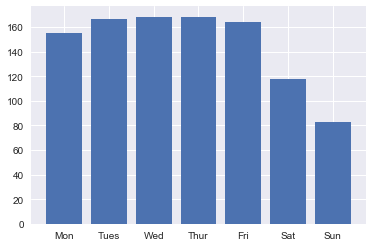

In [38]:
day_wk = df_filt.groupby(['DAY_OF_WK_N']).DELTA_EXITS.mean() #define day of week groups
x = np.array([0,1,2,3,4,5,6])
y = np.array(day_wk)
my_xticks = ['Mon', 'Tues', 'Wed','Thur','Fri', 'Sat', 'Sun']
plt.xticks(x, my_xticks)
plt.bar(x, y)

In [39]:
station = df_filt.groupby(['STAT_MERGE']).DELTA_EXITS.sum().sort_values(ascending=False)
stat_array = station.index.values

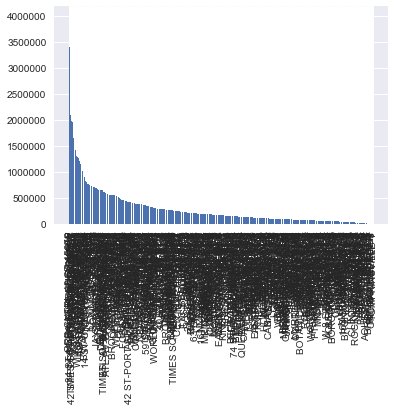

In [17]:
import pylab as pl


x = np.array([x for x in range(len(station))])
y = np.array(station)
my_xticks = stat_array
plt.xticks(x, my_xticks)
plt.bar(x, y)
pl.xticks(rotation = 'vertical')
plt.figure(figsize = (40,10))

In [40]:
#break time of day into segments
def get_time_of_day(string):
    hour = int(string.split(":")[0])
    if hour > 9 and hour <= 13:
        tod = 'Morning'
    elif hour > 13 and hour <= 17:
        tod = 'Afternoon'
    elif hour > 17 and hour <= 21:
        tod = 'Evening'
    elif hour > 21 and hour <= 5:
        tod = 'Night'
    else:
        tod = 'Dawn'
    return tod

df_filt["TIMEOFDAY"] = df_filt["TIME"].apply(lambda row: get_time_of_day(row))
b = df_filt.groupby(["UNIT","STATION", "DAY_OF_WK", "TIME"]).agg({"DELTA_EXITS" : sum})
b.sort_values(by="DELTA_EXITS", ascending=False)

#rank categorical
df_filt['DAY_OF_WK'] = pd.Categorical(df_filt['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_filt['TIMEOFDAY'] = pd.Categorical(df_filt['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

df_filt.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TIMEDIFF,HRSDIFF,DAY_OF_WK,DAY_OF_WK_N,STAT_MERGE,DELTA_ENTRIES,DELTA_EXITS,TIMEOFDAY
151276,R240,R047,00-00-01,GRD CNTRL-42 ST,4567S,IRT,2017-05-24,01:00:00,REGULAR,79374,81698,2017-05-24 01:00:00,04:00:00,4,Wednesday,2,GRD CNTRL-42 ST-4567S,4591.0,1365.0,Dawn
151834,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-10,20:00:00,REGULAR,28652861,8757415,2017-05-10 20:00:00,04:00:00,4,Wednesday,2,GRD CNTRL-42 ST-4567S,4481.0,16.0,Evening
128664,R138,R293,00-00-04,34 ST-PENN STA,123ACE,IRT,2017-05-25,18:00:00,REGULAR,17396517,8182957,2017-05-25 18:00:00,04:00:00,4,Thursday,3,34 ST-PENN STA-123ACE,4349.0,1516.0,Evening
151196,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-16,20:00:00,REGULAR,28683723,8769962,2017-05-16 20:00:00,04:00:00,4,Tuesday,1,GRD CNTRL-42 ST-4567S,4310.0,31.0,Evening
150903,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-22,20:00:00,REGULAR,28718908,8784054,2017-05-22 20:00:00,04:00:00,4,Monday,0,GRD CNTRL-42 ST-4567S,4193.0,11.0,Evening


In [ ]:
#test heat map on one train line
#nqr_59 = df_filt[df_filt['STAT_MERGE'] == '59 ST-NQR456W']
#mask = ['STAT_MERGE','C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','DATE_TIME','DAY_OF_WK_N','EXITS','DELTA_ENTRIES']
#nqr_59.drop(mask,axis=1,inplace=True)
#nqr_59.head()

In [ ]:
#nqr_59['DAY_OF_WK'] = pd.Categorical(nqr_59['DAY_OF_WK'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#nqr_59['TIMEOFDAY'] = pd.Categorical(nqr_59['TIMEOFDAY'], ['Dawn','Night', 'Evening','Afternoon','Morning'])

# Load pivot of mean EXITS by TIMEGROUP, DAY_OF_WK
#exits_test = nqr_59.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS")

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(exits_test, annot=True, linewidths=.5, ax=ax,square=True)

In [ ]:
#exits = df_filt.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')


In [46]:
grouped_d = df_filt.groupby(["STAT_MERGE", 'DATE',"DAY_OF_WK", "TIMEOFDAY"], as_index=False).agg({'DELTA_EXITS' : sum})
grouped_d.head()
len(grouped_d)

grouped_means = grouped_d.groupby(["STAT_MERGE","DAY_OF_WK", "TIMEOFDAY"], as_index=False).DELTA_EXITS.mean()
grouped_means.head()
len(grouped_means)

16625

In [44]:
## Our original way of grouping top stations by exits by day times

#grouped_d = df_filt.groupby(["STAT_MERGE", "DAY_OF_WK", "TIMEOFDAY"], as_index=False).agg({"DELTA_EXITS" : sum})

#def top_five(df_filt):
#    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#    times = ['Dawn', 'Morning', 'Afternoon', 'Evening', 'Night']
#    for day in days:
#        for time in times:
#            mask = ((df_filt['DAY_OF_WK'] == day) & (df_filt['TIMEOFDAY'] == time))
#            temp_df = df_filt[mask].sort_values(by = ['DELTA_EXITS'], ascending = False).reset_index()
#            print(day, time,'\n', temp_df.head())
#			
#top_five(grouped_d)

In [65]:
hubs_mask = ((df_filt.STAT_MERGE == 'GRD CNTRL-42 ST-4567S') | 
                (df_filt.STAT_MERGE == 'TIMES SQ-42 ST-1237ACENQRSW') | 
                (df_filt.STAT_MERGE == '42 ST-PORT AUTH-1237ACENQRSW') |
                (df_filt.STAT_MERGE == '34 ST-PENN STA-ACE') |
                (df_filt.STAT_MERGE == '34 ST-PENN STA-123ACE') |
                (df_filt.STAT_MERGE == '42 ST-PORT AUTH-1237ACEGNRSW'))
no_hubs = df_filt.drop(df_filt[hubs_mask].index)
hubs = df_filt[hubs_mask]
#hubs.head()
#no_hubs.head(10)

In [58]:
exits = df_filt.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')

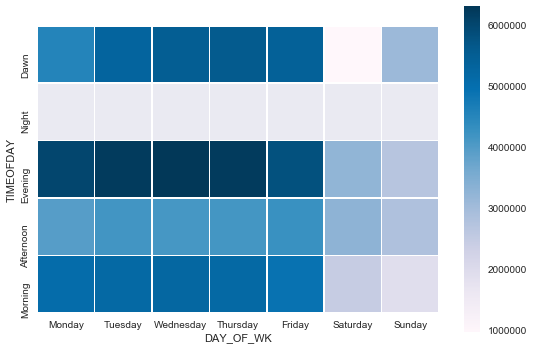

In [66]:
exits = no_hubs.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')

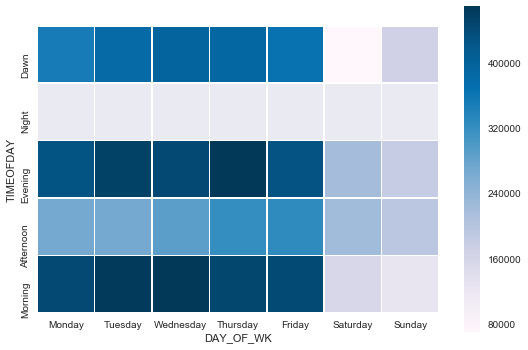

In [68]:
exits = hubs.pivot_table(index = "TIMEOFDAY", columns = "DAY_OF_WK", values = "DELTA_EXITS",aggfunc='sum')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(exits, annot=False, fmt="n", linewidths=.5, ax=ax,square=True, cmap='PuBu')